In [1]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch
import math
import torch.nn as nn
from torch.optim import Adam
from networks import LinearRegressionModel
import seaborn as sns

# Understanding the UTKFaceAugmented.csv

In [2]:
# Load the dataset
df = pd.read_csv('data/UTKFaceAugmented.csv')

# Print the first 5 rows of the dataframe.
print(df.head())
# Print the first 5 rows of the dataframe for column 'age'.
print(df.columns)


   Unnamed: 0                                filename  age  gender   race  \
0           0  100_0_0_20170112213500903.jpg.chip.jpg  100    male  white   
1           1  100_0_0_20170112215240346.jpg.chip.jpg  100    male  white   
2           2  100_1_0_20170110183726390.jpg.chip.jpg  100  female  white   
3           3  100_1_0_20170112213001988.jpg.chip.jpg  100  female  white   
4           4  100_1_0_20170112213303693.jpg.chip.jpg  100  female  white   

  age_range  num_haircuts_life has_tiktok remembers_disco uses_skincare  \
0   100-119                360         no              no            no   
1   100-119                627         no              no            no   
2   100-119                687         no             yes            no   
3   100-119                710         no              no            no   
4   100-119                614         no              no            no   

   max_annual_earnings  
0         32890.160162  
1         29870.803247  
2         6

In [3]:
# Seperate the targets (filenames)
file_information = df['age']
csv_headers = ['gender','race','num_haircuts_life','has_tiktok','remembers_disco','uses_skincare','max_annual_earnings']
csv_titles = df[csv_headers]

#Print the shape of the dataframe to help understand the amount of data 
print(df.shape)
print(df.dtypes)

(23708, 11)
Unnamed: 0               int64
filename                object
age                      int64
gender                  object
race                    object
age_range               object
num_haircuts_life        int64
has_tiktok              object
remembers_disco         object
uses_skincare           object
max_annual_earnings    float64
dtype: object


Plotting the numerical variables to better understand their relationships with age

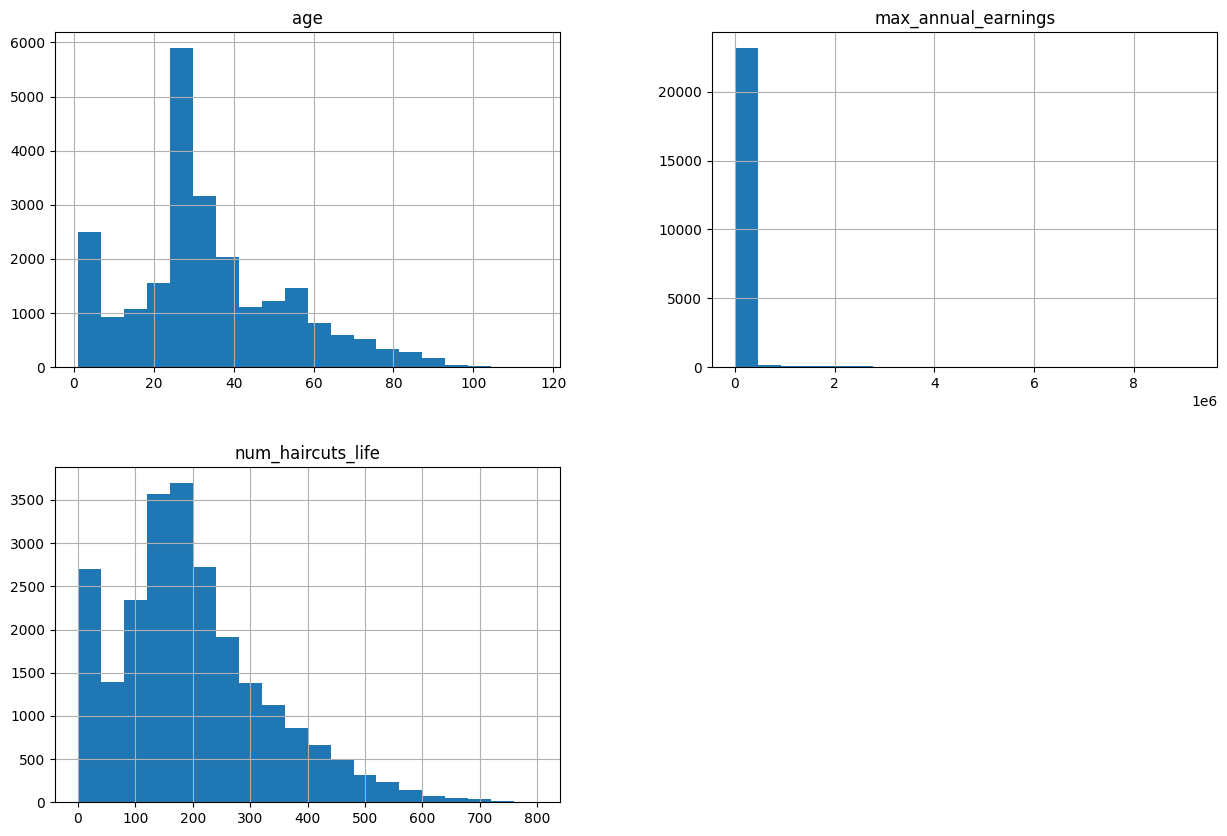

In [4]:
selected_columns = ['age', 'max_annual_earnings', 'num_haircuts_life']
df[selected_columns].hist(bins=20, figsize=(15, 10)) # Plot the histogram
plt.show()

Plotting the categorical variables to better understand their relationships with age

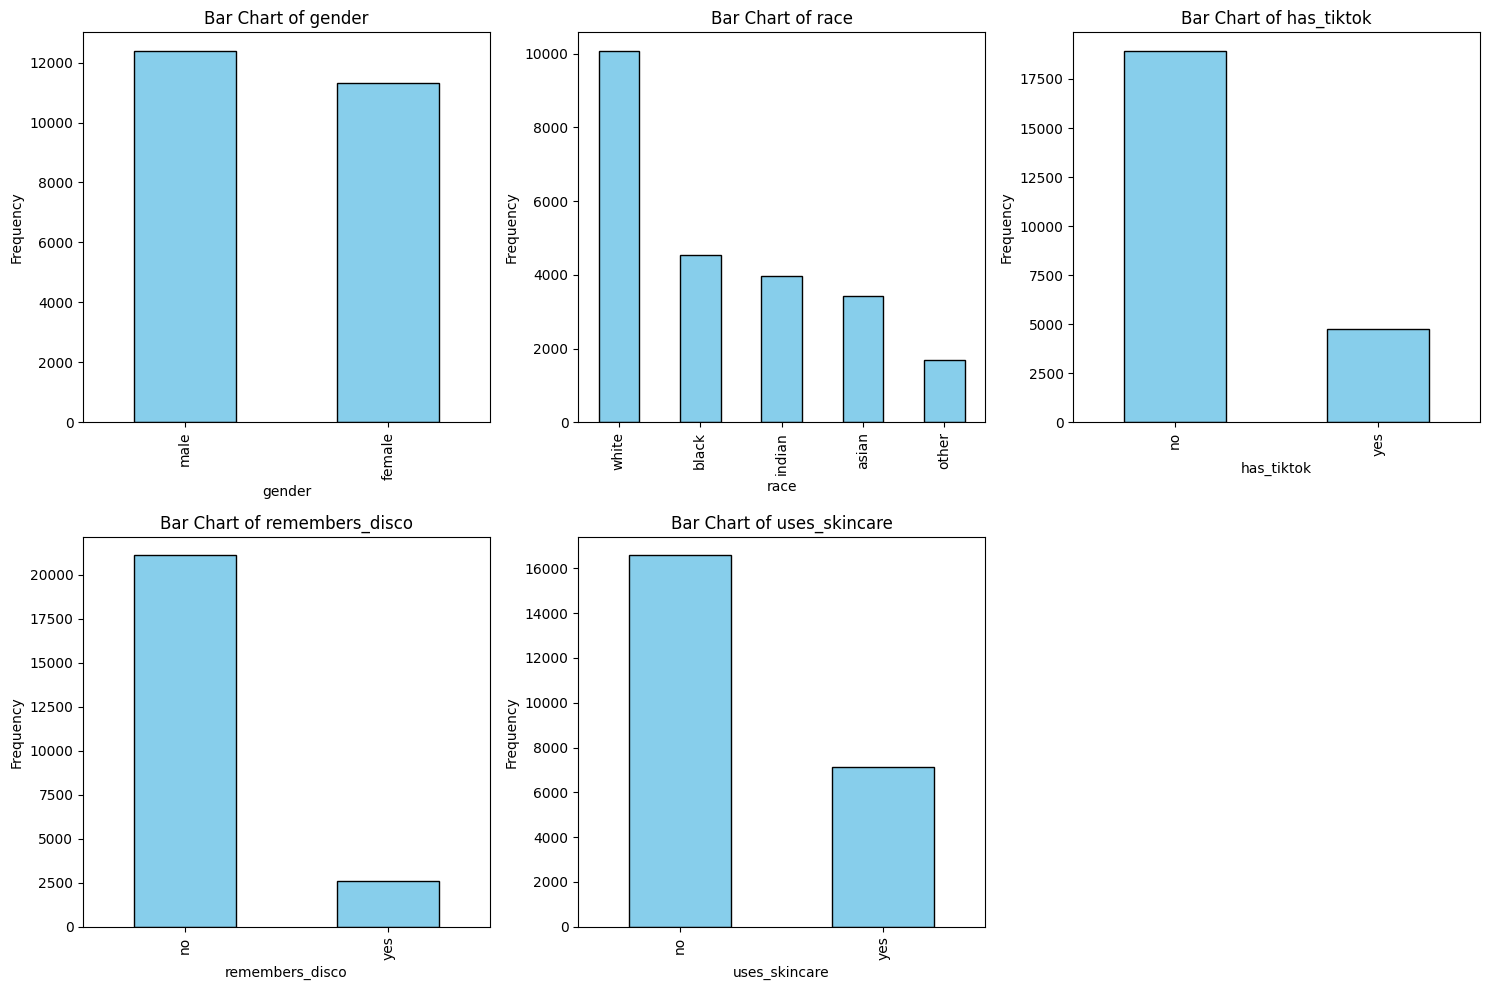

In [5]:
csv_headers = ['gender', 'race', 'has_tiktok', 'remembers_disco', 'uses_skincare']

# Calculate the number of rows and columns for subplots
num_features = len(csv_headers)
num_cols = 3  # You can change the number of columns as needed
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows)) # Create subplots
axes = axes.flatten()

# Iterate over features and plot bar charts
for i, feature in enumerate(csv_headers):
    ax = axes[i]
    feature_counts = df[feature].value_counts()
    feature_counts.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'Bar Chart of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Pre-Processing Data

In [6]:
# Encode categorical variables (gender, race, age_range)
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['race'] = label_encoder.fit_transform(df['race'])
df['age_range'] = label_encoder.fit_transform(df['age_range'])

# Encode binary columns (has_tiktok, remembers_disco, uses_skincare)
binary_columns = ['has_tiktok', 'remembers_disco', 'uses_skincare']
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Handle missing values
df = df.dropna()

# Select features and target variable
features = ['gender', 'race', 'num_haircuts_life', 'has_tiktok', 'remembers_disco', 'uses_skincare', 'max_annual_earnings']
X = df[features]
y = df['age']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


# Understanding the images from data/images

Image 1 Properties:
Size: (200, 200)
Mode: RGB
Format: JPEG
 
Image 2 Properties:
Size: (200, 200)
Mode: RGB
Format: JPEG
 
Image 3 Properties:
Size: (200, 200)
Mode: RGB
Format: JPEG
 
Image 4 Properties:
Size: (200, 200)
Mode: RGB
Format: JPEG
 
Image 5 Properties:
Size: (200, 200)
Mode: RGB
Format: JPEG
 


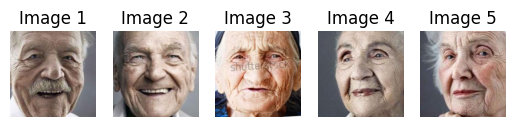

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import os

path = 'data/images'

# Get a list of image files in the folder
image_files = [f for f in os.listdir(path) if f.endswith(('.jpg', '.jpeg'))]

# Display the first five images along with their properties
for i in range(min(5, len(image_files))):
    image_path = os.path.join(path, image_files[i])

    # Open the image file
    image = Image.open(image_path)

    # Display image properties
    print(f"Image {i + 1} Properties:")
    print(f"Size: {image.size}")
    print(f"Mode: {image.mode}")
    print(f"Format: {image.format}")
    print (" ")

    # Display the image using Matplotlib
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels
    plt.title(f'Image {i + 1}')

plt.show()